# <font color='gold'> ***Biblioteca de São Paulo: Avaliações dos Usuários no Google*** </font> 📚

<kbd><img src="https://www.educacao.sp.gov.br/wp-content/uploads/2017/12/30981811591_252bec049e_o.jpg" width=1000 height=350></kbd>

Nesse projeto, realizaremos uma Análise Qualitativa e Quantitativa das avaliações feitas no Google pelos usuários da biblioteca. No momento em que este trabalho é realizado, a institutição possuí **675** reviews no Google. Ao longo da análise nos debruçaremos sobre o dataset para compreender suas características, por agora, delimitamos que a pesquisa se sustenta a partir de três etapas:

<font color='gold'>**1. Coleta**</font>

- Utilizando a extensão **[Instat Data Scrapper](https://https://chromewebstore.google.com/detail/instant-data-scraper/ofaokhiedipichpaobibbnahnkdoiiah)** do Google Chrome, realizamos a raspagem dos dados das avaliações do Google.
- O processo de raspagem gerou um arquivo CSV (comma separeted values) que pode ser vizualizado no repositório deste projeto.

<font color='gold'>**2. Manipulação**</font>

- Com os dados tabelados em formato CVS, utilizamos o presente relatório em um Jupyter Notebook pelo Google Colaboratory para realizar a manipulação e exploração dos dados, utilizando a linguagem Python com seus módulos específicos para análise de dados (Pandas, Matplotlib, Numpy, etc)
- Além disso, utilizamos a LLM ChatGPT como ferramenta auxiliar de análise de sentimentos e busca por padrões e tendências nos dados. Todas as instâncias em que a Inteligência Artifical foi utilizada para chegar a alguma conclusão serão explicitadas claramente, como forma de preservar a integridade da pesquisa e proporcionar o maior grau de transparência possível sobre o processo de análise.

<font color='gold'>**3. Visualização**</font>

- Utilizando o módulo Matplotlib do Python, algumas visualizações foram geradas para visualização.

Como questões centrais que abordaremos nessa pesquisa, temos:

>***1. Qual o impacto do dispositivo na comunidade que atende?***
>
>***2. Como as avaliações foram mudando ao longo do tempo? A pandemia de COVID-19 teve impacto?***

# <font color='gold'>***Importando Pacotes e Conhecendo Dados*** 📦🎲</font>
---

In [105]:
# Importando bibliotecas necessárias para a análise:
import pandas as pd
import numpy as np
import string
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
import wordcloud

# Importando módulos específicos de alguma bibliotecas:
from datetime import datetime, timedelta
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud

# Baixar o pacote de stopwords do módulo nltk:
nltk.download('stopwords')

# Retirando avisos da execução do código para uma visualização mais limpa:
warnings.filterwarnings('ignore')

# Mostrando as versões utilizadas dos pacotes:
print('Pacotes prontos! Versões utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy       --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
print(f'Seaborn     --> {sns.__version__}')
print(f'Nltk        --> {nltk.__version__}')
print(f'WordCloud   --> {wordcloud.__version__}')

Pacotes prontos! Versões utilizadas:

Pandas      --> 2.2.2
Numpy       --> 2.0.2
Matplotlib  --> 3.10.0
Seaborn     --> 0.13.2
Nltk        --> 3.9.1
WordCloud   --> 1.9.4


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
# Criando o DataFrame:
df = pd.read_csv("/content/drive/MyDrive/ALAN/Trabalho/bsp_raw_final.csv")

In [107]:
# Visualizando os primeiros 5 registros dos dados:
df.head()

,Usuário,Cronologia,Estrelas,Comentário
0,Marcus Vinicius Campos,2 semanas atrás,5,NaN
1,Ademi Alves,2 semanas atrás,5,NaN
2,Joao Natalino De Sousa Filho,4 semanas atrás,5,NaN
3,Ana Julia Bucci Camillo,um mês atrás,5,Uma paraíso para quem ama ler ou quer passar c...
4,Michele A Anjos,um mês atrás,5,Biblioteca lindaFuncionário EducadosFácil acesso


In [108]:
# Visualizando uma sample aleatória dos dados:
df.sample(5)

,Usuário,Cronologia,Estrelas,Comentário
556,Beatriz Ledo,7 anos atrás,5,NaN
332,Cristiano Gomes,3 anos atrás,5,NaN
269,Ariany Souza,3 anos atrás,5,NaN
565,Henrique Cayoni,7 anos atrás,5,NaN
208,Inaiá,2 anos atrás,5,NaN


Para termos uma compreensão clara de nossos dados, iremos criar um dicionário de variáveis contendo as colunas do Dataset e a descrição de seu conteúdo:

| Variável   | Conteúdo                                 |
|------------|------------------------------------------|
| `Usuário`  | Nickname do usuário no google            |
| `Cronologia`| A quanto tempo a review foi feita       |
| `Estrelas` | Número de estrelas (de 1 a 5) que o usuário deu na review            |
| `Comentário`   | Comentário adicionado pelo usuário na sua review       |

Com alguns registros aparentes, podemos estrair algumas características inicias do conjunto de dados:

- A variável `Usuário` não será utilizada nas análises por uma questão prática de que não serão necessários os nomes dos usuários para avaliarmos as reviews. Sobre questões de anonimato, levou-se em consideração que o usuário, usufruindo de suas plenas liberdades individuais, optou por atribuir seu nickname em uma review numa plataforma de acesso público e irrestrito. Para a consistência dos dados, mesmo que essa variável não será utilizada, a mesma será mantida no dataset.

- A variável `Cronologia` possuí diferentes tipos de entrada de dados: enquanto algumas entradas utilizam números ("5 anos atrás"), outras, especificamente reviews de 1 ano atrás, utilizam apenas uma string ("um ano atrás"). Isso será considerado nas análises e manipulação.

- A variável `Estrelas` possuí apenas números inseridos manualmente pelos pesquisadores, pois a extensão Instant Data Scrapper não coletava esse dado no formato presente nas avaliações do google (formato visual de estrelas). Foram realizadas minusciosas avaliações para nos certificarmos de que as entradas dos dados manuais estão corretas, não havendo atribuição de estrelas diferentes das feitas pelos usuários.

- A variável `Comentário` apresenta diversos campos vazios (NaN), o que indica um bom número de reviews dos usuários sem comentários, apenas com as estrelas, o que torna impossível ter uma contextualização maior acerca dos motivos de um usuário dar o número de estrelas que deu em sua avaliação.

Como outros ajustes, também iremos renomear as colunas para que tenham seus nomes em lowercase. Também iremos inserir algumas novas colunas para fortalecer as análises, tendo essas etapas ocorrendo na etapa de limpeza e tratamento dos dados.

Para uma visão mais completa das dimensões dos dados que estamos trabalhando, vamos checar o shape do dataset:

In [109]:
# Checando dimensões dos dados:
print(f'Dataset composto por {df.shape[0]} registros contemplados por {df.shape[1]} variáveis.')

Dataset composto por 674 registros contemplados por 4 variáveis.


Também se faz necessária a checagem do tipo de dados dessas variáveis:

In [110]:
# Checando tipos de dados das variáveis:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Usuário     674 non-null    object
 1   Cronologia  674 non-null    object
 2   Estrelas    674 non-null    int64 
 3   Comentário  354 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.2+ KB


Com isso, temos algumas informações importantes sobre os dados:

- O dataset possuí 3 variáveis completamente preenchidas, com a variável `Comentário` possuíndo 320 registros vazios (subtrai-se do total de registros, 674, os 354 non-null)
- Pelo dataset ser pequeno, não modificaremos o tipo `int64` por `int16` da vartiável `Estrelas`, pois o impacto na memória durante a execução do dataset é negligenciável. Porém em datasets maiores, este tratamento é recomendado.
- Para compreendermos melhor a temporalidade das avaliações, assim como facilitar a etapa de visualização, a variável `cronologia` tera seu tipo de dado alterado para `datetime`.


Para coletarmos mais informações sobre a distribuição da unica variável numérica `Estrelas`, utilizaremos o método `.describe()`:

In [111]:
# Descreve estatisticamente as variáveis numéricas e mostra o resultado numa tabela transposta:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estrelas,674.0,4.62908,0.871601,1.0,5.0,5.0,5.0,5.0


Com a descrição estatística, podemos ter alguns insights iniciais:

- A Biblioteca de São Paulo possuí avaliação média de 4.6 estrelas, o que condiz exatamente com o dado fornecido ao pesquisar a biblioteca no Google.
- As avaliações possuem um desvio padrão de 0.87. Um desvio padrão baixo significa que os dados são mais homogêneos e estão próximos da média.
- Temos quartis homogêneos, todos indicando 5 estrelas. Isso indica que temos uma maioria muito grande de avaliações 5 estrelas nos dados.

Também iremos coletar informações sobre as variáveis categóricas do dataset:

In [112]:
# Descreve estatisticamente as variáveis categóricas e mostra o resultado numa tabela transposta:
df.describe(exclude='number').T

,count,unique,top,freq
Usuário,674,673,Victor,2
Cronologia,674,33,3 anos atrás,165
Comentário,354,348,Ótima,3


Com esse descritivo, temos um insight importante apenas na variável `Cronologia`:

- O maior número de reviews foram feitas a 3 anos atrás, 2022, sendo 165 somente neste período. Iremos explorar mais a fundo essa característica dos dados na etapa de manipulação.

# <font color='gold'> ***Tratamento e Manipulação*** 🗃️ </font>
---

Nesta etapa iremos realizar as modificações e adições que descrevemos anteriormente entre outras, sendo elas:

- Alterar o tipo de dado da variável `Cronologia` para `datetime`;
- Tratar os valores nulos na variável `Comentário`;
- Definir uma nova variável para categorizar a variável `Estrelas`, dando um label para cada intervalo de estrelas;
- Criar uma variável para explicitar se a avaliação foi feita antes, durante ou depois da pandemia de Covid-19;
- Criar uma nova variável contendo os comentários limpos, utilizando o módulo `stopwords` para isso.
- Renomear as variáveis utilizando lowercase e definir as posições das variáveis.

## **Alterando variável para datatype**

In [113]:
# Função para alterar o datatype:
def converter_para_data(valor: str) -> datetime | None:
    """
    Converte uma expressão temporal em texto (ex.: 'há 2 semanas', '1 mês atrás', 'um dia')
    para um objeto datetime correspondente à data aproximada no passado.

    A função identifica unidades de tempo (dias, semanas, meses, anos)
    e subtrai o intervalo detectado da data e hora atual.

    Exemplos:
        >>> converter_para_data("há 2 dias")
        datetime(2025, 10, 26, 13, 0, 0)
        >>> converter_para_data("1 semana atrás")
        datetime(2025, 10, 21, 13, 0, 0)
        >>> converter_para_data("um mês")
        datetime(2025, 9, 28, 13, 0, 0)

    Args:
        valor (str): Texto contendo uma expressão temporal, como "há 3 dias" ou "1 ano atrás".

    Returns:
        datetime | None: Data resultante da conversão, ou None caso o texto não contenha
        uma expressão temporal reconhecida.

    Notas:
        - A função assume uma média de 30 dias por mês e 365 dias por ano.
        - Valores como "um" são automaticamente convertidos para "1".
    """
    agora = datetime.now()
    valor = valor.lower()
    valor = re.sub(r'\bum\b', '1', valor)

    padroes = {
        'dia': r'(\d+)\s*dias?',
        'semana': r'(\d+)\s*semanas?',
        'mes': r'(\d+)\s*mes(es)?',
        'ano': r'(\d+)\s*anos?'
    }

    for unidade, padrao in padroes.items():
        match = re.search(padrao, valor)
        if match:
            quantidade = int(match.group(1))
            if unidade == 'dia':
                return agora - timedelta(days=quantidade)
            elif unidade == 'semana':
                return agora - timedelta(weeks=quantidade)
            elif unidade == 'mes':
                return agora - timedelta(days=30 * quantidade)
            elif unidade == 'ano':
                return agora - timedelta(days=365 * quantidade)

    return None


In [114]:
# Aplicando função na variável Cronologia para criar a nova variável data_avaliacao:
df['data_avaliacao'] = df['Cronologia'].apply(converter_para_data)

# Remove linhas sem data válida:
df.dropna(subset=['data_avaliacao'], inplace=True)

# Criando nova variável de Ano com base na variável data_avaliacao:
df['ano'] = df['data_avaliacao'].dt.year

In [115]:
# Visuaizando novas variáveis no dataset:
df.sample(5)

,Usuário,Cronologia,Estrelas,Comentário,data_avaliacao,ano
251,Eleasar Lima,3 anos atrás,5,NaN,2022-11-06 15:12:19.221180,2022
273,Victor,3 anos atrás,4,NaN,2022-11-06 15:12:19.221332,2022
476,Edmundo Nogueira,4 anos atrás,5,NaN,2021-11-06 15:12:19.222676,2021
406,Marcelo,4 anos atrás,5,NaN,2021-11-06 15:12:19.222215,2021
483,Lu Alves (LUA),5 anos atrás,2,Lugar meio vazio,2020-11-06 15:12:19.222722,2020


## **Tratando nulos dos comentários**

Aqui não iremos excluir do dataset aquelas avaliações que não possuem comentários, pois elas ainda possuem data points valiosos: número de estrelas. Por isso, iremos apenas utilizar um valor placeholder: "Sem comentário", para indicar essas reviews.

In [116]:
# Preencher comentarios vazios
df['Comentário'] = df['Comentário'].fillna("Sem comentário")

In [117]:
# Verificando:
df.sample(5)

,Usuário,Cronologia,Estrelas,Comentário,data_avaliacao,ano
399,Hugo,4 anos atrás,5,Sem comentário,2021-11-06 15:12:19.222160,2021
160,Larissa Costa,2 anos atrás,4,Sem comentário,2023-11-06 15:12:19.220580,2023
102,Nayara Gomes,um ano atrás,5,"Muito bom, minha filha amou.",2024-11-05 15:12:19.220177,2024
2,Joao Natalino De Sousa Filho,4 semanas atrás,5,Sem comentário,2025-10-08 15:12:19.219518,2025
94,joana darck,um ano atrás,5,Sem comentário,2024-11-05 15:12:19.220123,2024


## **Categorizando intervalo de estrelas**



Para uma análise clustrizada, iremos nomear alguns intervalos de dados como sentimentos dos usuários com base em suas estrelas, sendo:

- Avaliações de 1 a 2 estrelas: Negativo
- Avaliações de 3 estrelas: Neutro
- Avaliações de 4 a 5 estrelas: Positivo

In [118]:
# Criar função para a variável sentimento baseada em estrelas da avaliação:
def rotulo_sentimento(estrela: int | float) -> str:
    """
    Classifica o sentimento de uma avaliação com base na quantidade de estrelas.

    A função atribui rótulos qualitativos ('positivo', 'neutro' ou 'negativo')
    de acordo com a nota informada, geralmente proveniente de avaliações de usuários.

    Regras de classificação:
        - 4 ou 5 estrelas → 'positivo'
        - 3 estrelas → 'neutro'
        - 1 ou 2 estrelas → 'negativo'

    Exemplos:
        >>> rotulo_sentimento(5)
        'positivo'
        >>> rotulo_sentimento(3)
        'neutro'
        >>> rotulo_sentimento(2)
        'negativo'

    Args:
        estrela (int | float): Valor numérico da avaliação (ex.: 1 a 5).

    Returns:
        str: Rótulo de sentimento correspondente ('positivo', 'neutro' ou 'negativo').

    Notas:
        - Valores fracionários são aceitos (ex.: 4.5 é considerado 'positivo').
        - Caso o valor não esteja entre 1 e 5, o comportamento deve ser definido pelo contexto de uso.
    """
    if estrela >= 4:
        return 'positivo'
    elif estrela == 3:
        return 'neutro'
    else:
        return 'negativo'

In [119]:
# Aplicando a função no dataset para criar a variável:
df['sentimento'] = df['Estrelas'].apply(rotulo_sentimento)

In [120]:
# Verificando:
df.sample(5)

,Usuário,Cronologia,Estrelas,Comentário,data_avaliacao,ano,sentimento
193,Tadeu Luiz L. dos Santos.,2 anos atrás,5,"Espaço de conhecimento muito completo, com sal...",2023-11-06 15:12:19.220791,2023,positivo
470,michael vaz,4 anos atrás,5,Excelente local,2021-11-06 15:12:19.222637,2021,positivo
290,João Lucas,3 anos atrás,5,Lugar lindo e bem agradavel,2022-11-06 15:12:19.221443,2022,positivo
278,Nadine Bechara,3 anos atrás,5,"O espaço é muito agradável, cheio de luz e ven...",2022-11-06 15:12:19.221365,2022,positivo
314,Lorena Caliman,3 anos atrás,5,Sem comentário,2022-11-06 15:12:19.221600,2022,positivo


## **Categorizando cronologia da avaliação**

Para descobrirmos a proporcionalidade entre avaliações feitas antes, durante e depois da pandemia de Covid-19, iremos categorizar a cronologia das avaliações, a partir da nova variável `ano`.

In [121]:
# Criando função para criar os rótulos novos:
def rotulo_periodo(ano: int) -> str:
    """
    Classifica um ano em relação aos períodos da pandemia de COVID-19.

    A função categoriza o ano informado em três intervalos temporais:
    - Pré-pandemia (até 2019)
    - Pandemia (2020 a 2022)
    - Pós-pandemia (a partir de 2023)

    Exemplos:
        >>> rotulo_periodo(2018)
        'pré-pandemia'
        >>> rotulo_periodo(2021)
        'pandemia'
        >>> rotulo_periodo(2024)
        'pós-pandemia'

    Args:
        ano (int): Ano a ser classificado (ex.: 2019, 2020, 2023).

    Returns:
        str: Rótulo do período correspondente ('pré-pandemia', 'pandemia' ou 'pós-pandemia').

    Notas:
        - Os intervalos podem ser ajustados conforme a definição temporal adotada na pesquisa.
        - Ideal para categorizar dados históricos em séries temporais afetadas pela pandemia.
    """
    if ano <= 2019:
        return 'pré-pandemia'
    elif ano in (2020, 2021, 2022):
        return 'pandemia'
    else:
        return 'pós-pandemia'

In [122]:
# Aplicando função no dataset para criar nova variável periodo:
df['periodo'] = df['ano'].apply(rotulo_periodo)

In [123]:
# Verificando:
df.sample(5)

,Usuário,Cronologia,Estrelas,Comentário,data_avaliacao,ano,sentimento,periodo
424,Thalyne Nathiary,4 anos atrás,5,Sem comentário,2021-11-06 15:12:19.222336,2021,positivo,pandemia
250,Gi Almeida,3 anos atrás,5,"Lugar maravilhoso, tranquilo, organizando, lim...",2022-11-06 15:12:19.221174,2022,positivo,pandemia
362,Lavinia Kethilyn,3 anos atrás,5,Sem comentário,2022-11-06 15:12:19.221910,2022,positivo,pandemia
348,Sandra Correa,3 anos atrás,5,Sem comentário,2022-11-06 15:12:19.221820,2022,positivo,pandemia
660,Wanderley Castorini,9 anos atrás,5,Local agradável grande acervo totalmente infor...,2016-11-07 15:12:19.223911,2016,positivo,pré-pandemia


## **Limpando comentários**

Utilizando do módulo `stopwords`, iremos criar uma nova variável no dataset contendo os comentários dos usuários limpos.

In [124]:
# Configurando o stopwords para filtrar pela língua portuguesa:
stopwords_pt = set(stopwords.words('portuguese'))

# Criando função para limpar os comentários:
def limpar_texto(texto: str) -> str:
    """
    Limpa e normaliza um texto em português para análise textual ou processamento de linguagem natural (PLN).

    A função realiza as seguintes etapas:
        1. Converte todo o texto para minúsculas.
        2. Remove pontuação.
        3. Tokeniza o texto (separa em palavras).
        4. Remove stopwords (palavras muito frequentes e pouco informativas, como 'de', 'a', 'e', etc.).
        5. Reconstrói o texto limpo como uma única string.

    Exemplos:
        >>> limpar_texto("A Biblioteca de São Paulo é incrível!")
        'biblioteca são paulo incrível'

    Args:
        texto (str): Texto original a ser limpo e normalizado.

    Returns:
        str: Texto processado, em minúsculas, sem pontuação nem stopwords.

    Notas:
        - A lista `stopwords_pt` deve conter as stopwords em português.
        - Recomenda-se importar a lista de stopwords da biblioteca NLTK ou definir uma lista personalizada.
        - Ideal para pré-processamento em tarefas de análise de sentimentos, classificação ou modelagem de tópicos.
    """
    if not isinstance(texto, str):
        return ''

    texto_minusculo = texto.lower()
    texto_sem_pontuacao = ''.join(
        caractere for caractere in texto_minusculo if caractere not in string.punctuation
    )
    tokens = texto_sem_pontuacao.split()
    tokens_filtrados = [token for token in tokens if token not in stopwords_pt]

    return ' '.join(tokens_filtrados)

In [125]:
# Aplicando a função no dataset para criar a nova variável:
df['comentario_limpo'] = df['Comentário'].apply(limpar_texto)

In [126]:
# Verificando:
df.sample(10)

,Usuário,Cronologia,Estrelas,Comentário,data_avaliacao,ano,sentimento,periodo,comentario_limpo
32,Anderson LS,10 meses atrás,5,Sem comentário,2025-01-09 15:12:19.219702,2025,positivo,pós-pandemia,comentário
260,João Almeida,3 anos atrás,5,"Ótimo lugar para descansar, passar o tempo, le...",2022-11-06 15:12:19.221249,2022,positivo,pandemia,ótimo lugar descansar passar tempo ler estudar...
81,Talita Alessandra,um ano atrás,5,"Biblioteca pública maravilhosa, com um acervo ...",2024-11-05 15:12:19.220036,2024,positivo,pós-pandemia,biblioteca pública maravilhosa acervo incrível...
646,Eduardo Morales,9 anos atrás,5,Adoro passar horas estudando ou lendo lá.,2016-11-07 15:12:19.223819,2016,positivo,pré-pandemia,adoro passar horas estudando lendo lá
290,João Lucas,3 anos atrás,5,Lugar lindo e bem agradavel,2022-11-06 15:12:19.221443,2022,positivo,pandemia,lugar lindo bem agradavel
349,Joselia Pereira felix,3 anos atrás,5,"Um lugar super agradável para relaxar,ler e re...",2022-11-06 15:12:19.221826,2022,positivo,pandemia,lugar super agradável relaxarler refletir sobr...
590,ויקטור Hugo,8 anos atrás,5,Sem comentário,2017-11-07 15:12:19.223440,2017,positivo,pré-pandemia,comentário
480,Djalma Sena Jr,4 anos atrás,5,Sem comentário,2021-11-06 15:12:19.222702,2021,positivo,pandemia,comentário
167,Joyce Hiromi,2 anos atrás,5,Sem comentário,2023-11-06 15:12:19.220625,2023,positivo,pós-pandemia,comentário
330,eric rocha,3 anos atrás,5,Sem comentário,2022-11-06 15:12:19.221704,2022,positivo,pandemia,comentário


Salientamos que este método não garante uma análise 100% precisa dos sentimentos das avaliações, isto por que existem diversos erros de português, incompletudes nas palavras entre outros erros de digitação dos usuários, o que prejudica a precisão da função de transformação de texto.

Um algoritmo treinado especializado seria ideal para essa tarefa, porém isso foje do escopo do projeto, tanto em prazos de tempo estabelecidos e pela dinâmica própria do grupo de pesquisa.

## **Renomeando e finalizando a forma do dataset**

Para finalizar a etapa de manipulação, iremos renomear as variáveis para padronizá-las, além de reposicionar as colunas de maneira mais organizada e intuitiva.

In [127]:
# Renomeando e organizando colunas:
df = (
    df.rename(
        columns={
            'Usuário': 'usuario',
            'Cronologia': 'cronologia',
            'Estrelas': 'estrelas',
            'Comentário': 'comentario'
        }
    )
)

# Reposicionando colunas:
df = df.loc[
    :,
    ['usuario', 'estrelas', 'sentimento', 'comentario', 'comentario_limpo', 'cronologia',
     'data_avaliacao', 'ano', 'periodo']
]

In [128]:
# Visualizando dataset final:
df.head(5)

,usuario,estrelas,sentimento,comentario,comentario_limpo,cronologia,data_avaliacao,ano,periodo
0,Marcus Vinicius Campos,5,positivo,Sem comentário,comentário,2 semanas atrás,2025-10-22 15:12:19.219431,2025,pós-pandemia
1,Ademi Alves,5,positivo,Sem comentário,comentário,2 semanas atrás,2025-10-22 15:12:19.219505,2025,pós-pandemia
2,Joao Natalino De Sousa Filho,5,positivo,Sem comentário,comentário,4 semanas atrás,2025-10-08 15:12:19.219518,2025,pós-pandemia
7,Belle,5,positivo,Sem comentário,comentário,2 meses atrás,2025-09-06 15:12:19.219555,2025,pós-pandemia
8,adriana (drica),5,positivo,"Acervo incrível, tem de tudo um pouco, é uma b...",acervo incrível tudo pouco biblioteca fato arm...,2 meses atrás,2025-09-06 15:12:19.219563,2025,pós-pandemia


Com as colunas nomeadas e reorganizadas temos uma padronização melhor, onde elas descrevem bem o conteúdo das variáveis.

Agora, vamos salvar os dados tratados para podermos utilizá-los na próxima etapa e para termos um dataset limpo a disposição de qualquer pesquisador:

In [129]:
# Salvando os dados tratados:
df.to_csv('bsp_clean_final', sep=',', index=False)

# <font color='gold'> ***Análises e Visualizações*** 📊 </font>
---

Essa sessão será dedicada as análises e visualiazações geradas. Será divida em duas partes:

- Análises Quantitativas, onde serão abordadas perguntas como:
    - Qual a média de estrelas total das avaliações?
    - Qual a variação dessa média ao longo do tempo?
    - Quantas avaliações foram feitas por ano?
    - Das avaliações, quantas foram feitas por sentimento (positivo, negativo, neutro)?
    - Quantas avaliações foram feitas por perído (pré, durante, pós pandemia)?

- Análises Qualitativas, com as seguintes perguntas:
    - Quais foram os principais termos revelantes presentes nas avaliações no geral?
    - Quais os principais pontos de reclamação dos usuários?

## <font color='gold'> ***Análise Quantitativa*** </font>

### **Pergunta 1: Qual a média de estrelas total das avaliações?**

Para conseguir a média geral das avaliações, podemos utilizar o comando `.mean()`:

In [130]:
# Identificando média de estrelas:
media_total = df['estrelas'].mean()

print(f"Média geral das avaliações: {media_total:.2f} estrelas")

Média geral das avaliações: 4.63 estrelas


No geral, as avaliações possuem uma média de 4.63/5 estrelas, número que bate exatamente com o indicado na página do google da Biblioteca e suas avaliações.

### **Pergunta 2: Qual a variação dessa média ao longo do tempo?**

Para conseguirmos a variação, podemos calcular a média geral por ano e gerar uma visualização a partir disso:

In [131]:
# Criando tabela com as médias por ano:
media_estrelas_ano = df.groupby('ano')['estrelas'].mean().round(2).reset_index()

# Visualizando tabela:
media_estrelas_ano


,ano,estrelas
0,2013,5.00
1,2014,5.00
2,2015,4.40
3,2016,4.56
4,2017,4.49
5,2018,4.74
6,2019,4.79
7,2020,4.61
8,2021,4.70
9,2022,4.77


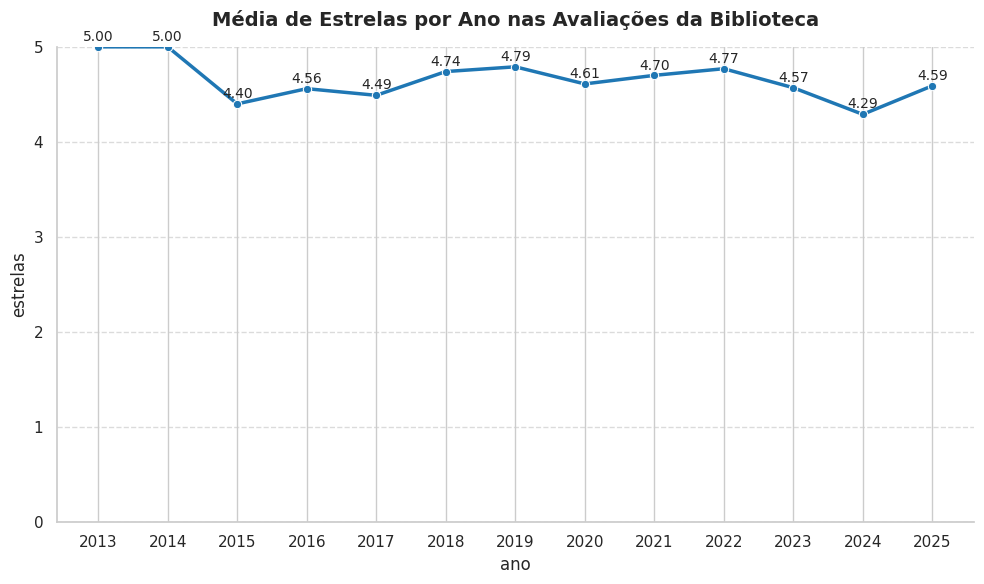

In [132]:
# Estilo visual moderno
sns.set_theme(style="whitegrid")

# Figura e eixos
plt.figure(figsize=(10,6))
ax = sns.lineplot(
    x=media_estrelas_ano['ano'],
    y=media_estrelas_ano['estrelas'],
    marker='o',
    color='#1f77b4',
    linewidth=2.5
)

# Rótulos de valores no topo de cada ponto
for ano, valor in zip(media_estrelas_ano['ano'], media_estrelas_ano['estrelas']):
    plt.text(ano, valor + 0.03, f"{valor:.2f}", ha='center', va='bottom', fontsize=10)

# Personalização do gráfico
plt.title('Média de Estrelas por Ano nas Avaliações da Biblioteca', fontsize=14, weight='bold', pad=15)
plt.ylim(0, 5)  # Escala típica de 1 a 5
plt.xticks(media_estrelas_ano['ano'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remover moldura superior e direita
sns.despine()

plt.tight_layout()
plt.show()


Temos uma variação muito baixa nas médias de estrelas, com valor máximo de 5 (nos anos de 2013 e 2014) e mínima de 4.29 (em 2024).

Porém vale destacar o número total de avaliações por ano na hora de interpretar esses dados. A próxima pergunta nos trará mais informações sobre como ler a variação das estrelas por ano.

### **Pergunta 3: Quantas avaliações foram feitas por ano?**

Para respondermos esta pergunta, vamos seguir a mesma lógica da pergunta anterior: criar uma tabela organizada por ano e total de avaliações e depois plotar um gráfico para visualização:

In [133]:
# Criando tabela de avaliações por ano:
total_avaliacoes_ano = df['ano'].value_counts().reset_index().rename(columns={'count':'avaliações'})

# Visualizando tabela:
total_avaliacoes_ano

,ano,avaliações
0,2022,167
1,2023,112
2,2021,96
3,2024,73
4,2016,41
5,2019,38
6,2017,37
7,2018,35
8,2020,33
9,2025,29


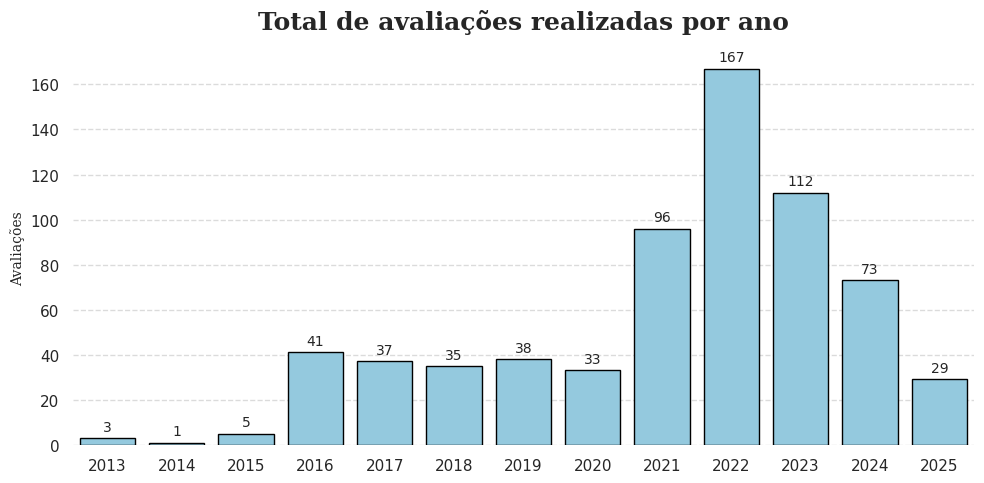

In [134]:
# Cria a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico de barras
sns.barplot(
    data=total_avaliacoes_ano,
    x='ano',
    y='avaliações',
    edgecolor='black',
    zorder=2,
    ax=ax,
    color='skyblue'
)

# Adiciona os rótulos (valores no topo das barras)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Título e eixos
plt.title(
    'Total de avaliações realizadas por ano',
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'},
    pad=15
)
plt.xlabel('')
plt.ylabel('Avaliações', fontsize=10, family='serif')

# Aparência geral
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


Com essa visualização, podemos ter uma noção melhor da representatividade de cada ano nas avaliações. Após respodermos todas as perguntas, iremos fazer uma sessão apresentando todos os achados e insights, por agora, se faz relevante o pico de 2022 e o fato de que 2013, 2014 e 2015 tiveram números negligenciáveis de avaliações.

### **Pergunta 4: Das avaliações, quantas foram feitas por sentimento (positivo, negativo, neutro)?**


In [135]:
# Criando tabela:
avaliacao_sentimento = df['sentimento'].value_counts().reset_index().rename(columns={'count':'avaliações'})

# Visualizando tabela:
avaliacao_sentimento

,sentimento,avaliações
0,positivo,616
1,negativo,33
2,neutro,21


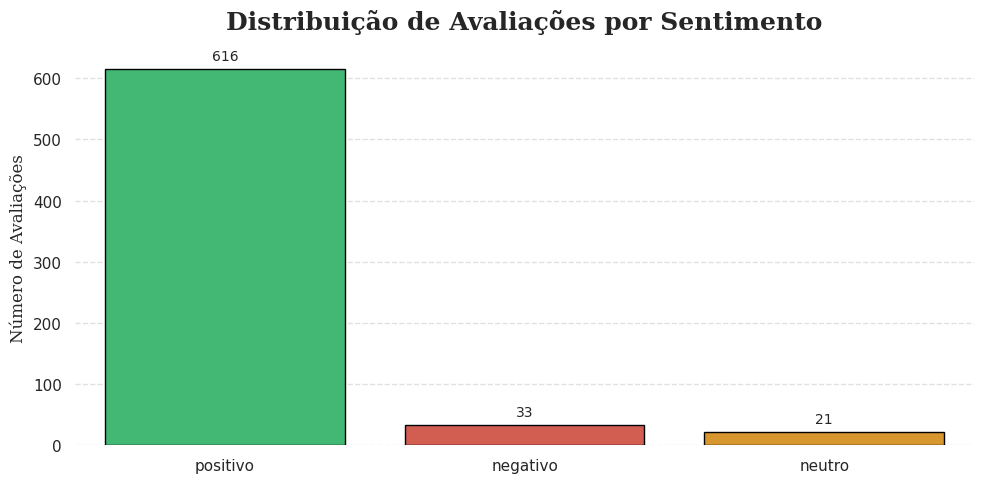

In [136]:
# Define o mapeamento de cores por sentimento
cores = {'positivo': '#2ecc71',  # verde
         'negativo': '#e74c3c',  # vermelho
         'neutro': '#f39c12'}    # laranja

# Cria a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico de barras
sns.barplot(
    data=avaliacao_sentimento,
    x='sentimento',
    y='avaliações',
    edgecolor='black',
    zorder=2,
    ax=ax,
    palette=cores
)

# Adiciona os rótulos (valores no topo das barras)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=4)

# Título e eixos
plt.title(
    'Distribuição de Avaliações por Sentimento',
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'},
    pad=15
)

plt.xlabel('', fontsize=12)
plt.ylabel('Número de Avaliações', fontsize=12, family='serif')

# Aparência geral
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=0)
sns.despine(left=True, bottom=True)

# Ajustes finais de layout
plt.tight_layout()
plt.show()


#### **Pergunta extra: Qual a porcentagem desses sentimentos nas avaliações por ano?**

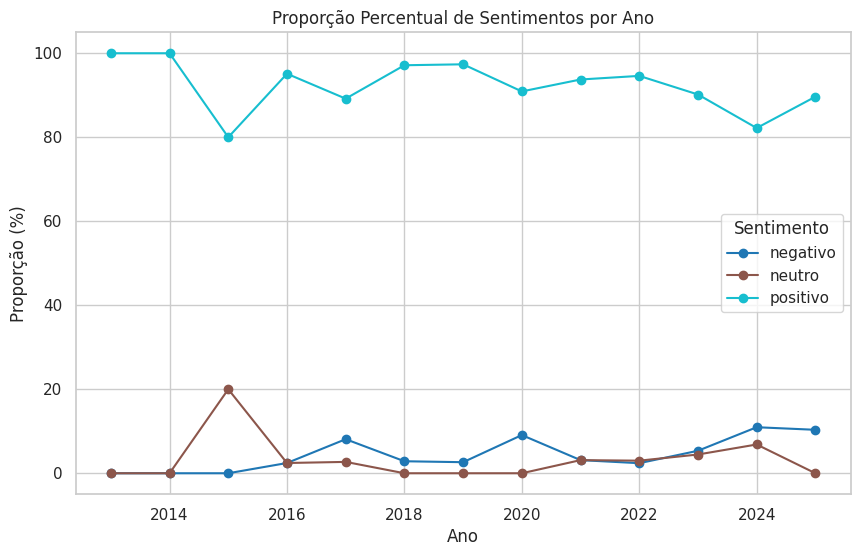

In [137]:
# Calcular contagem de sentimentos por ano
contagem_sentimentos = df.groupby(['ano', 'sentimento']).size().unstack().fillna(0)

# Calcular proporção percentual por ano (normalizando pelo total daquele ano)
proporcao_sentimentos = contagem_sentimentos.div(contagem_sentimentos.sum(axis=1), axis=0) * 100

# Plotar proporções de sentimentos ao longo dos anos
proporcao_sentimentos.plot(kind='line', marker='o', figsize=(10,6), colormap='tab10')
plt.title('Proporção Percentual de Sentimentos por Ano')
plt.xlabel('Ano')
plt.ylabel('Proporção (%)')
plt.grid(True)
plt.legend(title='Sentimento')
plt.show()

### **Pergunta 5: Quantas avaliações foram feitas por perído (pré, durante, pós pandemia)?**

In [138]:
# Criando tabela:
avaliacao_periodo = df['periodo'].value_counts().reset_index().rename(columns={'count':'avaliações'})

# Visualizando tabela:
avaliacao_periodo

,periodo,avaliações
0,pandemia,296
1,pós-pandemia,214
2,pré-pandemia,160


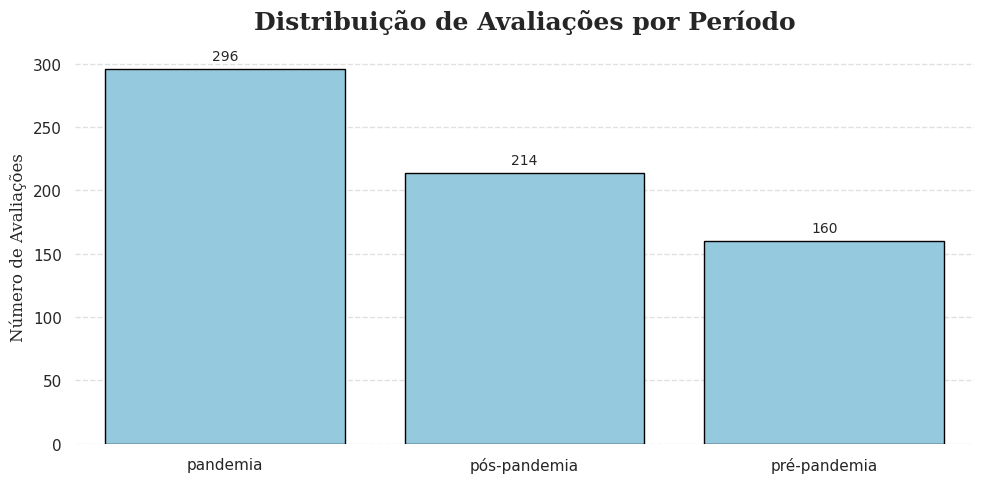

In [139]:
# Cria a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico de barras
sns.barplot(
    data=avaliacao_periodo,
    x='periodo',
    y='avaliações',
    edgecolor='black',
    zorder=2,
    ax=ax,
    color='skyblue'
)

# Adiciona os rótulos (valores no topo das barras)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=4)

# Título e eixos
plt.title(
    'Distribuição de Avaliações por Período',
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'},
    pad=15
)

plt.xlabel('', fontsize=12)
plt.ylabel('Número de Avaliações', fontsize=12, family='serif')

# Aparência geral
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=0)
sns.despine(left=True, bottom=True)

# Ajustes finais de layout
plt.tight_layout()
plt.show()

## <font color='gold'> ***Análise Qualitativa*** </font>

### **Pergunta 1: Quais foram os principais termos revelantes presentes nas avaliações no geral?**

Para respondermos essa pergunta, iremos utilizar a coluna de comentários limpos com um adicional: pelo fato dos comentários possuírem muitos erros de linguagem e incongruências, se tornou necessária uma etapa adicional de tratamento para retirar o maior número possível de palavras indesejadas ou erradas, tornando a visualização mais precisa.

In [140]:
# Unindo e todos os comentários não-vazios em uma única variável:
todos_comentarios = df[(df['comentario_limpo'].notna()) & (df['comentario_limpo'] != 'comentário')]['comentario_limpo'].str.lower()

# Junta todos os comentários em um único texto:
texto = ' '.join(todos_comentarios)

In [141]:
# Set para remoção de termos indesejados nos comentários limpos
termos_indesejados = set(['e','a','o','de','da','do','em','que','para','com','os','as', 'sem', 'comentário', 'um', 'uma', 'é', 'biblioteca', 'não',
                          'lugar', 'muito', 'bem', 'mal', 'tem', 'na','no', 'são', 'por', 'ao', 'se', 'como', 'mais', 'pra', 'ser', 'lá', 'paulo',
                          'mas', 'pena', 'está', 'eu', 'das', 'há', 'tanto', 'pois', 'mesmo', 'ter', 'dos', 'todos', 'onde', 'tudo', 'rua', 'fui', 'ou', 'quer',
                          'super', 'área', 'quando', 'nota', 'semana', 'quem', 'muitos', 'tinha', 'foi', 'fiquei', 'pode', 'nem', 'você', 'dia', 'dé', 'só',
                          'entrar', 'até', 'também', 'muitas', 'sempre', 'melhor', 'geral', 'outra', 'aqui', 'fala', 'parte', 'fica', 'alguma', 'lado',
                          'vezes', 'levar', 'demais', 'pegar', 'possui', 'possuí', 'ainda', 'falta', 'casa', 'sobre', 'acessar', 'horas', 'pouco', 'toda', 'ir', 'realmente',
                          'extremamente', 'esta', 'à', 'conta', 'nas', 'seu', 'todo', 'tempo', 'precisa', 'fi', 'wi', 'forma', 'outras', 'gosto', 'estão', 'pelo', 'seus',
                          'aos', 'nao', 'anos', 'sua', 'desde', 'vale', 'deveriam', 'porque', 'estava', 'melhores', 'céus', 'diversas', 'físico', 'pegou', '2', 'inclusive',
                          'uso', 'imaginava', 'encontrei', 'mezzo', 'devi', 'dove', 'unico', 'ritrovato', 'purtroppo', 'benissimo', 'domenica', 'di', 'aperta', 'che', 'questa',
                          'portoghese', 'il', 'volevo', 'male', 'po', 'trovato', 'io', 'recomemdo', 'esquece', 'pretende', 'procurei', 'p', 'dirijam', 'fortemente', 'estados',
                          'apto', 'progredindo', 'continua', 'afirmar', 'posso', 'muita', 'fiz', 'serem', 'vejo', 'isso', 'serve', 'la', 'bato', 'palmas', 'andar', 'primeiro',
                          'essa', 'piso', 'durante', 'nos', 'hoje', 'dava', 'prédio', 'voltar', 'levei', 'às', 'l', 'enviado', 'mail', 'aí', 'acontecem', 'fazer', 'so', 'me',
                          'passar', 'meio', 'dias', 'minha', 'ficar', 'alguns', 'outros', '10', 'deve', 'além', 'sp', 'opção', 'ar', 'próximo', 'situação', 'voltada', 'maior', 'achei', 'tipo',
                          'quanto', 'vc', 'cada', 'havia', 'fato', 'desta', 'sendo', 'alto', 'coisa', 'após', 'ponto', 'perto', 'deu', 'pude', 'mundo', 'menos', 'nessa', 'oferece', 'porém', 'final',
                          'sei', 'outro', 'apenas', 'simplesmente', 'deixa', 'suco', 'coisas', 'laranja', 'térreo', 'seria', 'vários', 'podemos', 'vou', 'fazem', 'consegui', 'embora', 'todas', '5', '06',
                          '1000', 'disso', 'algumas', 'and', 'sou', 'basta', 'deveria', 'mesma', 'etc', 'este', 'poderia', 'dão', 'umas', 'deste', 'nada', 'ele', 'ela', 'dele', 'dela', 'daquele',
                          'vejam', 'muinticimo', 'carinhozamnte', 'plentamente', 'rencomendo', 'bacaricia', 'hótima', 'vai', 'vez', 'algum', 'chega', 'próprio', 'ficam', 'amo', 'adulto',
                          'pessoa', 'pessoas'])

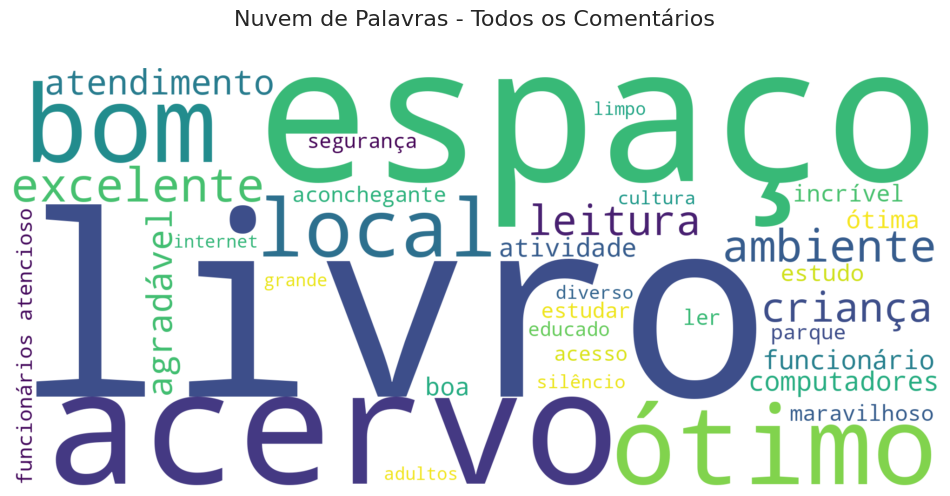

In [142]:
palavras = re.findall(r'\b\w+\b', texto)
palavras = ' '.join([palavra for palavra in palavras if palavra not in termos_indesejados])

nuvem = WordCloud(width=2000, height=900, background_color='white', max_words=35).generate(palavras)

plt.figure(figsize=(12,6))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Todos os Comentários', fontsize=16, pad=30)
plt.show()

Com a nuvem de palavras, fica clara a prevalência de avaliações positivas (como haviamos constatado previamente). Os termos "acervo", "livro", "espaço" e "ótimo" apresentam maior destaque.

### **Pergunta 2: Quais os principais pontos de reclamação dos usuários?**

Para essa pergunta, iremos criar um dataset filtrado apenas pelas avaliações com 3 ou menos estrelas, para compreendermos os motivos das reclamações. Com o dataset gerado, iremos exportá-lo para csv e utilizaremos o ChatGPT para uma análise textual dos comentários, buscando os termos e motivos da insatisfação dos usuários.

Os prompts exatos utiizados serão inseridos nesta seção, para maior trasparência da metodologia.

In [143]:
# Criando novo dataset com as avaliações neutras e negativas:
avaliacoes_negativas = df[(df.estrelas<=3)]

# Verificando dados:
avaliacoes_negativas.head()

,usuario,estrelas,sentimento,comentario,comentario_limpo,cronologia,data_avaliacao,ano,periodo
21,Erinalda JS,1,negativo,"Eu adoro essa biblioteca, o espaço é um charme...",adoro biblioteca espaço charme porém grande qu...,6 meses atrás,2025-05-09 15:12:19.219639,2025,pós-pandemia
24,Lucas Ribeiro,1,negativo,Exigem que qualquer tipo de bolsa seja guardad...,exigem qualquer tipo bolsa guardada possuem ca...,7 meses atrás,2025-04-09 15:12:19.219655,2025,pós-pandemia
28,Isabella Ananda,1,negativo,Descaso completo. Voltei à biblioteca após alg...,descaso completo voltei biblioteca após alguns...,8 meses atrás,2025-03-10 15:12:19.219678,2025,pós-pandemia
39,Natália Macedo,1,negativo,Não consegui achar a entrada. Deveria ser mais...,consegui achar entrada deveria sinalizado mora...,um ano atrás,2024-11-05 15:12:19.219747,2024,pós-pandemia
46,Marcelo Pacheco,3,neutro,Frequento todo domingo está biblioteca. Não ti...,frequento todo domingo biblioteca nenhuma quei...,um ano atrás,2024-11-05 15:12:19.219796,2024,pós-pandemia


In [144]:
# Extraindo o dataset para o formato csv:
avaliacoes_negativas.to_csv()

',usuario,estrelas,sentimento,comentario,comentario_limpo,cronologia,data_avaliacao,ano,periodo\n21,Erinalda JS,1,negativo,"Eu adoro essa biblioteca, o espaço é um charme. Porém, a grande quantidade de moradores de rua que fazem do local um albergue prejudica muito a experiência. Eles fazem arruaça, fedem, dormem no local e traz uma sensação de insegurança ao local. Não é possível focar na leitura ou estudos neste ambiente. Uma pena porque o espaço é super charmoso e tem um bom acervo de livros.",adoro biblioteca espaço charme porém grande quantidade moradores rua fazem local albergue prejudica experiência fazem arruaça fedem dormem local traz sensação insegurança local possível focar leitura estudos neste ambiente pena porque espaço super charmoso bom acervo livros,6 meses atrás,2025-05-09 15:12:19.219639,2025,pós-pandemia\n24,Lucas Ribeiro,1,negativo,"Exigem que qualquer tipo de bolsa seja guardada, mas não possuem capacidade de entregar as senhas para os armários numa velocidade raz

Levando o novo dataset para o ChatGPT, utilizamos o prompt:

*- "chat, vou te mandar o csv contendo apenas as avaliações com 3 estrelas ou menos. Quero que você faça uma análise da coluna "comentário" e me retorne quais são os principais pontos levantados pelos usuários que avaliaram mal a biblioteca"*

Com isso, conseguimos as seguintes avaliações:

**Principais pontos levantados pelos usuários:**

**1- Presença de pessoas em situação de rua e insegurança**

Esse é, de longe, o tema mais frequente nas avaliações negativas. Os termos e expressões mais utilizados foram:

> "moradores de rua", "fedor", "insegurança", "mendigos", "assaltos", "pessoas suspeitas", "não me senti seguro".

Como comentários representativos disso, temos, por exemplo:

> *A maioria das pessoas na biblioteca eram moradores de rua e outras pessoas suspeitas, fazendo da biblioteca seu albergue.*

> *Local extremamente perigoso, cheio de mendigos dentro e fora.*

> *Não consegui achar a entrada... tinha muito morador de rua dormindo nas laterais. Fiquei com medo.*



**2- Barulho e falta de silêncio**

Outro tema muito frequente, especialmente nas avaliações de 2 e 3 estrelas. Os termos e expressões mais utilizados foram:

> "barulho", "falando alto", "crianças correndo", "não dá pra estudar", "não tem silêncio".

Como comentários representativos deste tema, temos:

> *A biblioteca é tão barulhenta que parece um bar.*

> *Não serve para estudar. Serve apenas para passar o tempo na internet.*

> *Poluição sonora intensa. Maioria dos frequentadores não tem educação.*

**3- Atendimento e burocracia**

Embora menos recorrentes, surge em comentários longos e elaborados. Termos e expressões recorrentes:

> "funcionários", "burrocracia", "regras sem sentido", "email para doar livros", "falta de bom senso".

Como comentário representativo, temos:

> *Fiquei extremamente decepcionado com a 'burrocracia' desta instituição... deixei os livros num banco do parque.*

**4- Estrutura física e manutenção**

Temos termos e expreções que demonstram fustração com as estruturas e equipamentos da biblioteca:

> "tomadas quebradas", "wifi ruim", "banheiros ocupados", "parquinho maltratado", "sem estacionamento".

Como comentários representativos:

> *Muitas tomadas estragadas, o wi-fi é ruim... mesa de ping pong sob sol e chuva.*

> *Não há estacionamento e nem recuo de embarque e desembarque.*

**5- Mudança de perfil da biblioteca**

Essa temática surge como crítica em avaliações mais recentes, com termos e expressões como:

> "Já foi uma biblioteca", "hoje em dia é tudo, menos biblioteca", "virou lan house", "perdeu o propósito".

Como comentários representativos, temos:

> *Atualmente está cheia de pessoas que não estão lá pelos livros.*

> *Hoje em dia é tudo, menos biblioteca. Cheio de pessoas falando alto e crianças correndo.*

**6- Mençoes pontuais (menos frequentes)**

- **Horário de funcionamento e filas:** queixas sobre a abertura tardia e necessidade de senha pra entrar.
- **Acessibilidade:** um comentário questiona a falta de rampas e elevadores.
- **Acervo:** críticas pontuais sobre "livros aleatórios" e "falta de acervo básico".
- **Pandemia:** poucos comentários menscionam diretamente, e quando o fazem, tratam de restrições e fechamento temporário.

### **Pergunta extra: O que explica o aumento expressivo de avaliações em 2021 e 2022? Esse fenômeno tem a ver com a pandemia de covid-19?**

Como visualizamos na pergunta 3 da etapa de análises quantitativas (Quantas avaliações foram feitas por ano?), os anos de 2021 e 2022 representam um aumento expressivo na quantidade de avaliações feitas no Google pelos usuários da biblioteca.

Por ser uma discrepância tão grande nos dados, para finalizar este projeto, iremos nos debruçar sobre esse dois anos com a ajuda do ChatGPT novamente para análises de padrões e contextualização nos comentários.

In [145]:
# Criando dataset filtrado pelas avaliações de 3 anos atrás (2022):
avaliacoes_2022 = df[(df.cronologia=="3 anos atrás")]

# Visualizando uma sample aleatória dos dados:
avaliacoes_2022.sample(10)

,usuario,estrelas,sentimento,comentario,comentario_limpo,cronologia,data_avaliacao,ano,periodo
273,Victor,4,positivo,Sem comentário,comentário,3 anos atrás,2022-11-06 15:12:19.221332,2022,pandemia
346,Bruna Lima,5,positivo,Sem comentário,comentário,3 anos atrás,2022-11-06 15:12:19.221807,2022,pandemia
268,Michele Andrade,5,positivo,Sem comentário,comentário,3 anos atrás,2022-11-06 15:12:19.221300,2022,pandemia
363,Rubens Barros Jr.,5,positivo,Ótima,ótima,3 anos atrás,2022-11-06 15:12:19.221916,2022,pandemia
281,Davex,4,positivo,Sem comentário,comentário,3 anos atrás,2022-11-06 15:12:19.221385,2022,pandemia
384,Thäliä Alvës,5,positivo,Sem comentário,comentário,3 anos atrás,2022-11-06 15:12:19.222063,2022,pandemia
228,Raoni Holanda,5,positivo,Muitos cursos legais e ambiente maravilhoso,muitos cursos legais ambiente maravilhoso,3 anos atrás,2022-11-06 15:12:19.221020,2022,pandemia
222,marcos roberto felipe,5,positivo,Sem comentário,comentário,3 anos atrás,2022-11-06 15:12:19.220982,2022,pandemia
381,Allana Vitoria,5,positivo,Sem comentário,comentário,3 anos atrás,2022-11-06 15:12:19.222044,2022,pandemia
322,Thiago Giancoli Berto,5,positivo,Sem comentário,comentário,3 anos atrás,2022-11-06 15:12:19.221652,2022,pandemia


In [146]:
# Conferindo total de registros no ano de 2022:
print(f'2022 possui {avaliacoes_2022.shape[0]} avaliações.')

2022 possui 165 avaliações.


Também iremos criar um dataset filtrado pelas avaliações de 2021:

In [147]:
# Criando dataset filtrado pelas avaliações de 4 anos atrás (2021):
avaliacoes_2021 = df[(df.cronologia=="4 anos atrás")]

# Visualizando uma sample aleatória dos dados:
avaliacoes_2021.sample(10)

,usuario,estrelas,sentimento,comentario,comentario_limpo,cronologia,data_avaliacao,ano,periodo
449,Gabriela Correia,5,positivo,Sem comentário,comentário,4 anos atrás,2021-11-06 15:12:19.222501,2021,pandemia
429,Artur José Braga de Mendonça,5,positivo,Lugar muito agradável e o atendimento foi perf...,lugar agradável atendimento perfeito todos ate...,4 anos atrás,2021-11-06 15:12:19.222368,2021,pandemia
387,Jennifer Rodrigues,5,positivo,Sem comentário,comentário,4 anos atrás,2021-11-06 15:12:19.222083,2021,pandemia
410,Anigreice Marcolino,5,positivo,Sem comentário,comentário,4 anos atrás,2021-11-06 15:12:19.222241,2021,pandemia
468,Natali,5,positivo,"Ótimo lugar de lazer e entretenimento, excelen...",ótimo lugar lazer entretenimento excelente ate...,4 anos atrás,2021-11-06 15:12:19.222624,2021,pandemia
420,Hevelyn Manzolli Heveprys,5,positivo,Lugar agradável de mais 🤩,lugar agradável 🤩,4 anos atrás,2021-11-06 15:12:19.222310,2021,pandemia
401,Beatriz Souza,5,positivo,Sem comentário,comentário,4 anos atrás,2021-11-06 15:12:19.222173,2021,pandemia
438,eliana giovanoli,5,positivo,Amo esse espaço. Poicas vezes não encontrei os...,amo espaço poicas vezes encontrei livros procu...,4 anos atrás,2021-11-06 15:12:19.222426,2021,pandemia
406,Marcelo,5,positivo,Sem comentário,comentário,4 anos atrás,2021-11-06 15:12:19.222215,2021,pandemia
416,Lavinia Bento,5,positivo,Sem comentário,comentário,4 anos atrás,2021-11-06 15:12:19.222280,2021,pandemia


In [148]:
# Conferindo total de registros no ano de 2021:
print(f'2021 possui {avaliacoes_2021.shape[0]} avaliações.')

2021 possui 95 avaliações.


Com os dois novos datasets, iremos exportá-los para csv e aplicar o ChatGPT para análises.

In [149]:
# Transformando datasets em csv:
avaliacoes_2022.to_csv()
avaliacoes_2021.to_csv()

',usuario,estrelas,sentimento,comentario,comentario_limpo,cronologia,data_avaliacao,ano,periodo\n385,Talita Savini,5,positivo,Local excelente com funcionários maravilhosos!!!Muito agradável mesmo!!!,local excelente funcionários maravilhososmuito agradável,4 anos atrás,2021-11-06 15:12:19.222070,2021,pandemia\n386,Lincoln Silva,5,positivo,Lugar maravilhoso,lugar maravilhoso,4 anos atrás,2021-11-06 15:12:19.222076,2021,pandemia\n387,Jennifer Rodrigues,5,positivo,Sem comentário,comentário,4 anos atrás,2021-11-06 15:12:19.222083,2021,pandemia\n388,silene alvares,5,positivo,"Incrível, como sempre. Gostaria que tivessem mais jornais do dia.",incrível sempre gostaria jornais dia,4 anos atrás,2021-11-06 15:12:19.222089,2021,pandemia\n389,Digo Fabris,5,positivo,Sem comentário,comentário,4 anos atrás,2021-11-06 15:12:19.222096,2021,pandemia\n390,Maria da Penha Mamimoto,5,positivo,Sem comentário,comentário,4 anos atrás,2021-11-06 15:12:19.222102,2021,pandemia\n391,vanda penha de barros Barros,5,p

Para as análises, utilizamos o prompt:

- *Chat, irei te enviar um csv com as avaliações feitas no ano de 2021. Analise a coluna "comentário" e veja se conseguimos entender o motivo deste ano ser discrepante nos dados, marcando o primeiro ano de aumento expressivo das avaliações realizadas no google.*

#### **Contexto Geral de 2021**

- **Período:** Reabertura gradual das bibliotecas e espaços culturais, ainda com restrições de acesso e protocolos rígidos de segurança.

- **Sentimento predominante:** majoritariamente positivo, mas com picos de frustração e impaciência causados pelas regras de distanciamento e limitação de serviços.

- **Padrão quantitativo:** muitas avaliações com 5 estrelas e textos curtos (“Sem comentário”, “Lugar lindo”, “Excelente”).

**1- Principais temas identificados nos comentários de 2021:**

**1.1- Restrição de acesso e protocolos sanitários**

Palavras e expressões recorrentes:

> “não pude acessar”, “pandemia”, “covid”, “fechada”, “vacina”, “máscara”, “medidas de segurança”.

Trechos representativos:

> *“Não gostei. Não pude acessar as instalações. Agora a pandemia e o covid é desculpa para tudo.”*

> *“Por causa da falta de vacinas, não pude acessar o acervo.”*

> *“Ambiente totalmente respeitando as medidas de segurança e higiene referente à covid-19.”*

Síntese:
Esse é o tema central do ano. Os comentários refletem tensão entre dois grupos:

Visitantes que aprovam as medidas sanitárias e elogiam o cuidado e a segurança;

Visitantes que reagem com impaciência ou negação, sentindo-se impedidos de usufruir plenamente do espaço.

Esse embate explica a polarização e o comportamento atípico das avaliações.

**1.2- Valorização do ambiente e da limpeza**

Expressões frequentes:

> “ambiente limpo”, “organizado”, “seguro”, “agradável”, “bem cuidado”.

Trechos representativos:

> *“Um lugar muito bem cuidado e agradável. Mal posso esperar para voltar.”*

> *“Excelente! Muito organizado, limpo, vários monitores para ajudar.”*

> *“Ambiente respeitando as medidas de segurança e higiene.”*

Síntese:
Mesmo com restrições, os usuários demonstram gratidão e admiração pela qualidade física e operacional do espaço, uma valorização simbólica da biblioteca como lugar seguro em meio ao caos da pandemia.

**1.3- Reconhecimento do atendimento**

Palavras e trechos:

> “atendimento impecável”, “funcionários atenciosos”, “gentis”, “educados”, “nota 10”.

Trechos representativos:

> *“Atendimento gentil, ágil e impecável.”*

> *“Funcionários super atenciosos e educados! Fiz minha carteirinha, finalmente.”*

> *“Todos que trabalham lá são muito gentis e pacientes.”*

Os elogios à equipe aparecem como um contraponto emocional à dureza do período. O atendimento humanizado é percebido como uma forma de acolhimento simbólico.

**1.4- A biblioteca como refúgio durante a crise**

Palavras e temas:

> “tranquilo”, “descanso”, “lugar de paz”, “oásis”, “refúgio”, “natureza”.

Trechos:

> *“Sou apaixonada pela biblioteca. Um verdadeiro oásis.”*

> *“Recomendo... um lugar para relaxar e descansar a mente.”*

> *“Lugar agradável demais 🤩.”*

A instituição é vista como espaço de respiro emocional e psicológico. Esse imaginário de “refúgio urbano” intensifica-se justamente por conta do contexto pandêmico.

**1.5- Limitações práticas e críticas**

Mençoes pontuais:

> “não emprestam dicionários”, “CD/DVD apresenta problemas”, “wifi ruim”, “muitos moradores de rua gritando”.

Trechos:

> *“Wifi ruim, limpeza e segurança ótima, frequentadores sem educação.”*

> *“A biblioteca... não há silêncio, pois alguns moradores de rua gritam.”*

> *“Não emprestam dicionários para usar em casa.”*

Essas críticas pontuais mostram que a qualidade do ambiente físico era boa, mas alguns serviços ainda estavam limitados ou comprometidos.
Há também os primeiros indícios do tema que se tornará mais forte em 2023–2024: a presença de pessoas em situação de rua no entorno.

**1.6- Narrativas de saudade e expectativa**

Trechos:

> *“Mal posso esperar para voltar.”*

> *“Gostaria de visitar a parte de dentro, mas não é possível por conta da pandemia.”*

> *“Amo esse espaço, é lindo e convidativo a passar horas por lá.”*

Síntese:
Há uma forte carga emocional de saudade, de reencontro interrompido. Os comentários expressam nostalgia pela vivência plena da biblioteca e esperança pela normalização.

**2- Síntese interpretativa**

No entendimento do grupo de pesquisa, o ano de 2021 foi um outlier nos dados devido a transição emocional vivenciada pelos usuários no ano em questão:

- A pandemia de Covid-19 ainda impunha limites e tensões sociais, mas a reabertura começava a reacender afetos positivos e vínculos simbólicos com a biblioteca.

- A BSP aparece como um lugar de esperança, onde a presença humana (funcionários, público) ganhava valor simbólico importante durante esse período.

#### **Contexto Geral de 2022**

**Período:** Ano marcado pela reabertura plena das atividades presenciais e retomada do funcionamento regular da biblioteca após as restrições da pandemia de COVID-19.

**Sentimento predominante:** O sentimento geral das avaliações é fortemente positivo. Os comentários expressam satisfação, entusiasmo e reconhecimento da biblioteca como um espaço de convivência e lazer. As menções críticas são raras e, quando aparecem, tratam de observações pontuais sobre infraestrutura ou lotação.

**Padrão quantitativo:** O pico de 2022 decorre de um volume expressivo de avaliações curtas e altamente positivas, majoritariamente com 5 estrelas. Grande parte dos registros contém frases simples — “Excelente lugar”, “Muito bom”, “Ótimo espaço”, “Perfeito para relaxar” — ou estão sem comentário textual. Esse padrão indica um movimento massivo de visitantes satisfeitos, motivado provavelmente pela reabertura total e retomada das atividades culturais e presenciais.

**1- Principais temas identificados nos comentários de 2022:**

**1.1- Reabertura e retomada das atividades presenciais**

Trechos representativos:

> *“Uma das mais bonitas bibliotecas da cidade de São Paulo voltou com suas atividades presenciais.”*

> *“Com a exigência de máscara, o público volta a frequentar a biblioteca e suas diversas atividades.”*

> *“Muitos eventos dentro da biblioteca que acontecem sempre... atividades on-line e presenciais.”*

Síntese: Os usuários comemoram o retorno das atividades presenciais e culturais. A biblioteca é percebida como um símbolo da retomada social após o período de isolamento.

**1.2- Melhoria percebida na estrutura e limpeza**

Termos mais recorrentes:

> “limpa”, “organizada”, “ambiente agradável”, “confortável”, “iluminado”, “arejada”.

Trechos representativos:

> *“Local organizado, funcionários atenciosos, limpeza nota 1000.”*

> *“Ambiente saudável, tranquilo, onde podemos ler e estudar.”*

> *“A área externa recentemente restaurada do piso térreo está incrível.”*

Síntese: Há percepção de renovação física (reformas, limpeza, iluminação, restauração de áreas externas), o que melhora a imagem do espaço.

**1.3- Valorização dos funcionários**

Trechos representativos:

> *“Os funcionários são muito atenciosos.”*

> *“Atendimento excelente, equipe nota 10.”*

> *“Funcionários felizes, receptivos e educados, mesmo no domingo.”*

Síntese: O tom das avaliações indica um forte reconhecimento ao atendimento, contrastando com críticas mais antigas sobre “burocracia” e “rigidez”.

**1.4- Experiência familiar e inclusão infantil**

Palavras recorrentes:

> “crianças”, “família”, “filhos”, “área infantil”, “bebês”, “eventos”.

Trechos:

> *“Ambiente perfeito para ir com os filhos, espaço infantil cheio de livros e brinquedos.”*

> *“Um ótimo lugar para o final de semana com a família.”*

> *“Leitura para bebês e crianças... tudo gratuito!”*

Síntese: A biblioteca é descrita como ambiente familiar e educativo, o que amplia o público-alvo e gera muitas avaliações espontâneas positivas (pais, mães, professores).

**1.5- Ênfase no lazer, conforto e bem-estar**

Expressões frequentes:

> “relaxar”, “descansar”, “aconchegante”, “tranquilo”, “ficar em paz”, “ler e se divertir”.

Trechos:

> *“Ótimo lugar para descansar, passar o tempo, ler e estudar.”*

> *“Lugar maravilhoso, tranquilo, organizado, limpo.”*

> *“Espaço incrível... proporciona bem-estar.”*

Síntese: A biblioteca passou a ser vista não apenas como um espaço de leitura, mas como um espaço de convivência e descanso, fortemente associado à ideia de bem-estar urbano.

**1.6- Estrutura tecnológica e conectividade**

Mençoes recorrentes:

> “wi-fi”, “computadores”, “internet”, “setor gamer”, “vídeos”, “YouTube”.

Trechos:

> *“Boa conexão de internet, computadores e espaço para games.”*

> *“Ótima estrutura, funcionários atenciosos, setor gamer, jogos de tabuleiro.”*

Síntese: Usuários destacam o uso de tecnologia e áreas multimídia, apontando uma biblioteca moderna e híbrida — leitura, lazer e tecnologia convivendo.

**2. Sintese interpretativa:**

Para nós, o ano de 2022 representou um ponto muito positivo na percepção da biblioteca pelo público. As avaliações refletem entusiasmo com o retorno e pela redescoberta do espaço da BSP, enxergando a biblioteca como um espaço seguro e agradável após o isolamento pandêmico.

A combinação entre o retorno físico ao espaço, a percepção de melhorias estruturais e a recuperação simbólica da biblioteca como lugar de lazer e bem-estar coletivo explica o comportamento atípico e fortemente positivo do ano de 2022.